In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
df_SNP = pd.read_csv("matrix_1kg.txt", sep = '\t')
df_SNP
#0 value if both copies of the C allele
#1 Value if one copy of the C allele and one of the T allele
#2 Value if two copies of the T allele

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
alt_counts = df_SNP.iloc[:,4:].sum(axis=1) #take the sum of each column
#calculate the frequency
sample_size = len(df_SNP.iloc[1,4:])
Al_freq = alt_counts/(sample_size*2) #multiply by two because of diploidy
df_SNP['Allele Frequency'] = Al_freq #Add allele frequency to data frame

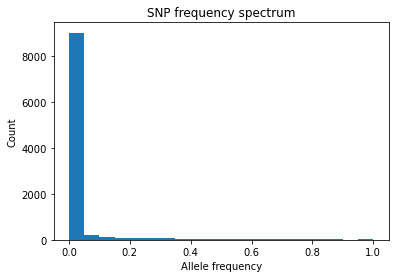

In [21]:
#Plotting
fig,axis = plt.subplots()
plt.hist(Al_freq, bins=20)
plt.title('SNP frequency spectrum')
plt.xlabel('Allele frequency')
plt.ylabel('Count')
plt.show()

In [22]:
#Subset the data frame to "common variation", where the alternate allele frequency is between 0.05 and 0.95
subset = (Al_freq >= 0.05) & (Al_freq <= 0.95)
Common_Variation = df_SNP[subset]
Common_Variation
#df.iloc[0:2, 0:3]
#pca_output_df = pd.merge(pca_output_df, df_metadata)

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,Allele Frequency
20,chr21,26683267,T,G,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.080259
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,2,0,0,0,1,1,1,0,0.595761
38,chr21,34522570,A,T,0,1,2,1,1,1,...,1,0,1,1,1,1,2,0,1,0.405612
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.094388
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.097527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,1,2,0.841837
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0.115973
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0.180730
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,2,2,2,2,1,2,2,2,2,0.810047


Text(0, 0.5, 'Counts')

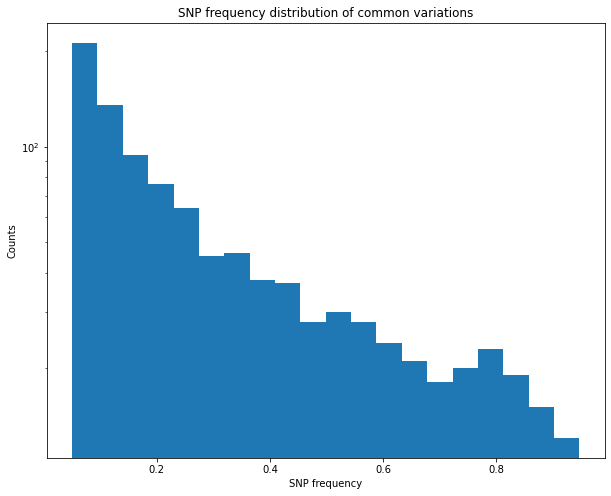

In [23]:
fig, ax = plt.subplots(figsize = (10., 8.))
ax.hist(Common_Variation['Allele Frequency'],bins = 20, log = True)
ax.set_title('SNP frequency distribution of common variations')
ax.set_xlabel('SNP frequency')
ax.set_ylabel('Counts')

#Perform principal components analysis to cluster the samples based on their SNP genotypes. 
#Plot your samples on the first and second principal components.
#HINT: Your figure should have 2548 data points.

In [40]:
pca_input = Common_Variation.iloc[:,4:-1]
pca_input = pca_input.T
pca_input_standardized = StandardScaler().fit_transform(pca_input) #standard scaling of matrix
pca_input_standardized.mean(axis = 0)#takes the standardized pca values 

pca_input_standardized.var(axis=0)
#do pca 
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output


array([[-6.14493037, -9.81856673, -1.54599575, ...,  0.81055158,
        -4.25832924,  0.60188044],
       [-6.13388414, -8.63182911,  2.55717592, ...,  4.53390781,
        -0.06573364,  2.4276174 ],
       [-6.23847319, -7.97187001, -0.7457903 , ..., -1.99828628,
         0.05420653, -1.59598134],
       ...,
       [-4.09694721, -2.82736157, -4.17983054, ..., -0.55395228,
         4.81109332, -0.82906975],
       [-6.26346243, -2.58507996, -4.22594393, ..., -0.84973839,
         1.99581171, -0.08523746],
       [-3.17677867, -0.91694976, -6.45070339, ...,  2.87263006,
         2.54498367, -0.15514284]])

In [41]:
pca_output.shape

(2548, 10)

Text(0, 0.5, 'PC2')

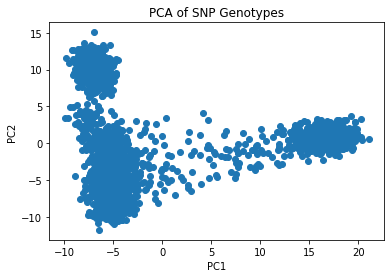

In [44]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
plt.title('PCA of SNP Genotypes')
plt.xlabel('PC1')
plt.ylabel('PC2')